In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

# Visualizing digits

In [4]:
# Modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale= 2)

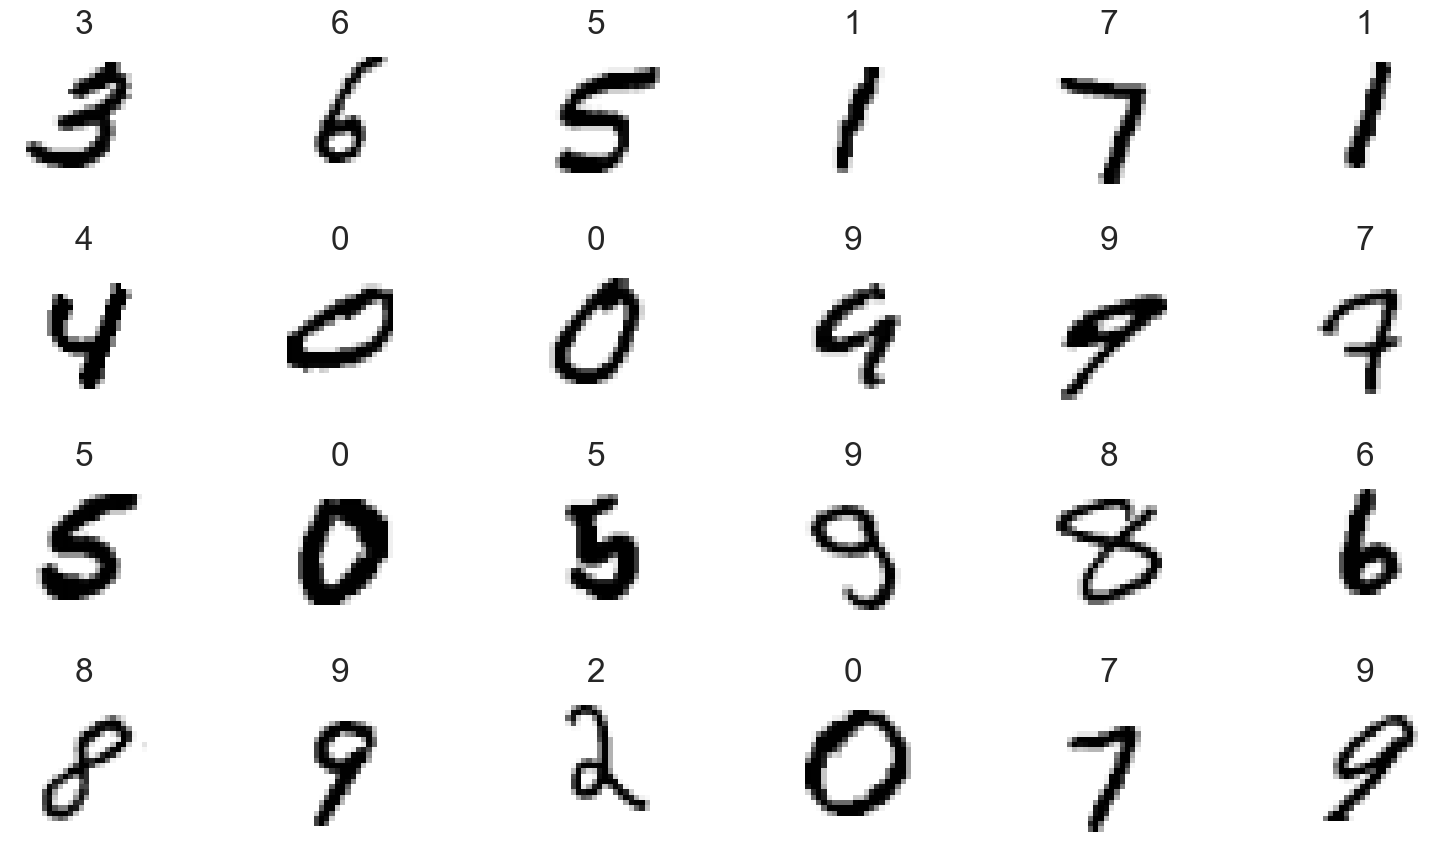

In [5]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False) #rnadomly selecting specific photos
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

# Processing

In [6]:
#reshaping the training set
X_train = X_train.reshape((60000,28,28,1))
# X_train.shape

X_test = X_test.reshape((10000,28,28,1))



#normalizing the Image Data
#-------------> Deep learning networks perform better on data that is scaled either into the range 0.0 to 1.0, or to a range
## for which the data’s mean is 0.0 and its standard deviation is 1.0.39

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [7]:

#Converting the Labels From Integers to Categorical Data
import tensorflow
from tensorflow.keras.utils import to_categorical # type: ignore

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_test.shape

(10000, 10)

In [8]:
#creating a neural network

from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D # type: ignore

cnn = Sequential() # -----> the technique applied here is called 'feed-forward network'

#<---------------> Adding Layers to the Network

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #first hidden layer
cnn.add(MaxPooling2D(pool_size = (2,2))) #for reducing dimensionality to reduce overfitting

cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu')) #second round of layers
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten()) # preparing output for the one-dimensional final predictions
# Adding a Dense Layer to Reduce the Number of Features for model to learn
cnn.add(Dense(units = 128, activation = 'relu'))  #this layer creates 128 neurons (units) that learn from the 3200 outputs of the previous flattened layer
cnn.add(Dense(units = 10, activation = 'softmax')) #converts the values of these remaining 10 neurons into classification probabilities.
print(cnn.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

# Model's Structure

# Configuring Keras to Write the TensorBoard Log Files

In [9]:
from tensorflow.keras.callbacks import TensorBoard
import time

tensorboard_callback = TensorBoard(log_dir=f'./logs/mnist{time.time()}',
histogram_freq=1, write_graph=True)

# compiling model

In [11]:
cnn.compile(optimizer= 'adam',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

#Training
cnn.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split = .1, callbacks=[tensorboard_callback])

Epoch 1/10
844/844 [==============================] - 120s 138ms/step - loss: 0.1426 - accuracy: 0.9568 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 2/10
844/844 [==============================] - 120s 143ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0358 - val_accuracy: 0.9895
Epoch 3/10
844/844 [==============================] - 117s 139ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 4/10
844/844 [==============================] - 117s 139ms/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 5/10
844/844 [==============================] - 116s 138ms/step - loss: 0.0159 - accuracy: 0.9946 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 6/10
844/844 [==============================] - 116s 138ms/step - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0358 - val_accuracy: 0.9905
Epoch 7/10
844/844 [==============================] - 116s 137ms/step - loss: 0.0103 - accuracy: 0.9962 - val_loss: 0.0405 -

# Evaluation

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.0364 - accuracy: 0.9890


In [ ]:
predictions = cnn.predict(X_test)
y_test[2]

313/313 [==============================] - 6s 19ms/step


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
for index, probability in enumerate(predictions[2]):
    print(f'{index}: {probability:.10%}')

0: 0.0000431229%
1: 99.9605119228%
2: 0.0015137399%
3: 0.0000042803%
4: 0.0174306784%
5: 0.0001289062%
6: 0.0003536544%
7: 0.0196115609%
8: 0.0003647264%
9: 0.0000380897%


# Locating incorrect predictions

In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p,e) in enumerate(zip(predictions, y_test)): #unpacking a tuple
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
len(incorrect_predictions)

110

# visualizing the incorrect predictions

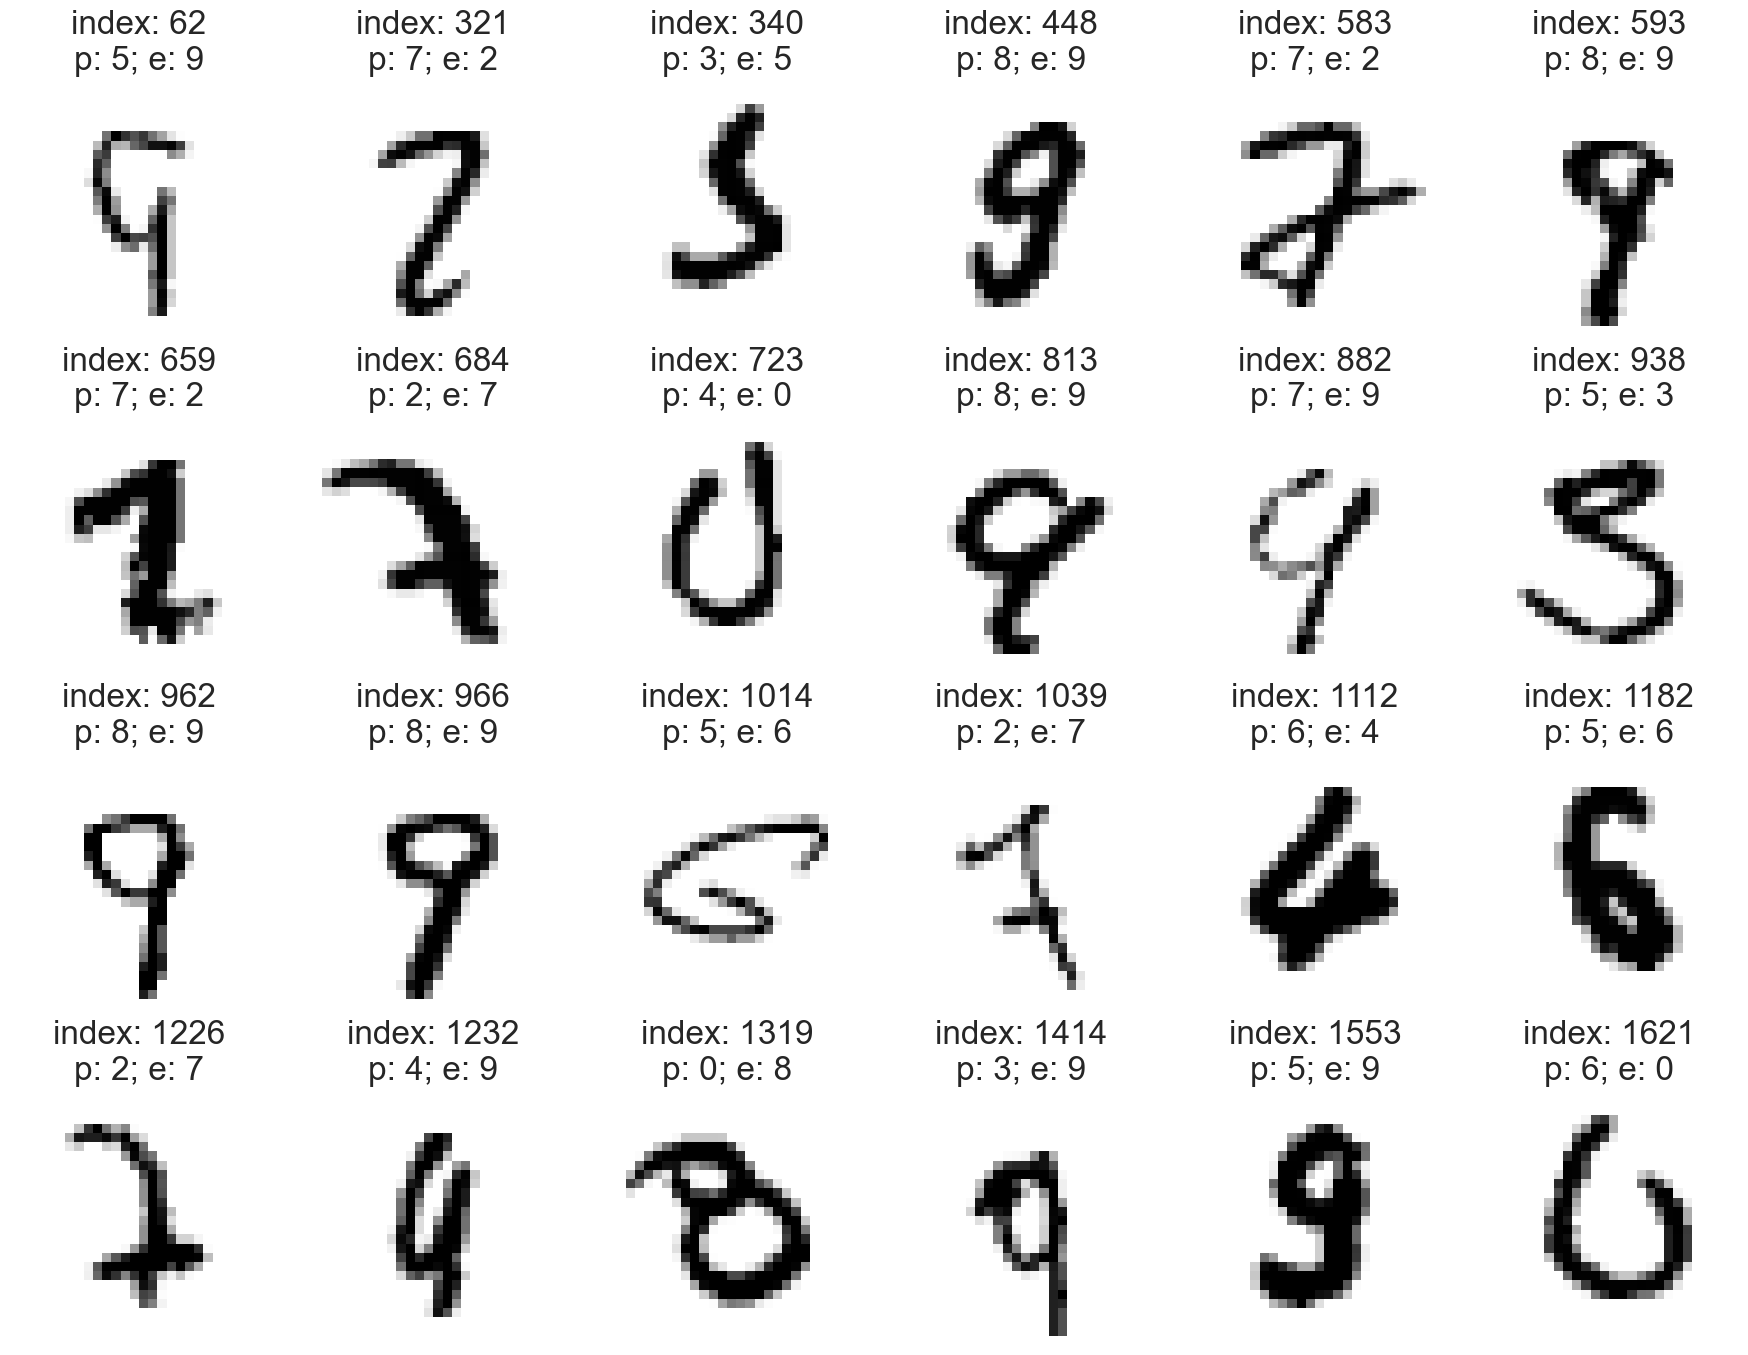

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(18, 14))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
    f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
display_probabilities(predictions[1414])

0: 6.2545321882%
1: 0.3914680798%
2: 0.8233781904%
3: 35.4980111122%
4: 20.9020942450%
5: 2.2349011153%
6: 0.0675048679%
7: 2.7164937928%
8: 7.4571669102%
9: 23.6544474959%


In [ ]:
cnn.save('mnist_cnn.h5')